In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mikeio import Dfsu, Mesh
meshfilename = r"C:\Program Files (x86)\DHI\2020\MIKE Zero\Examples\MIKE_3\FlowModel_FM\ELOS\Odense_Estuary\Data\Bathymetry\odense_rough.mesh"

msh = Mesh()

msh.read(meshfilename)

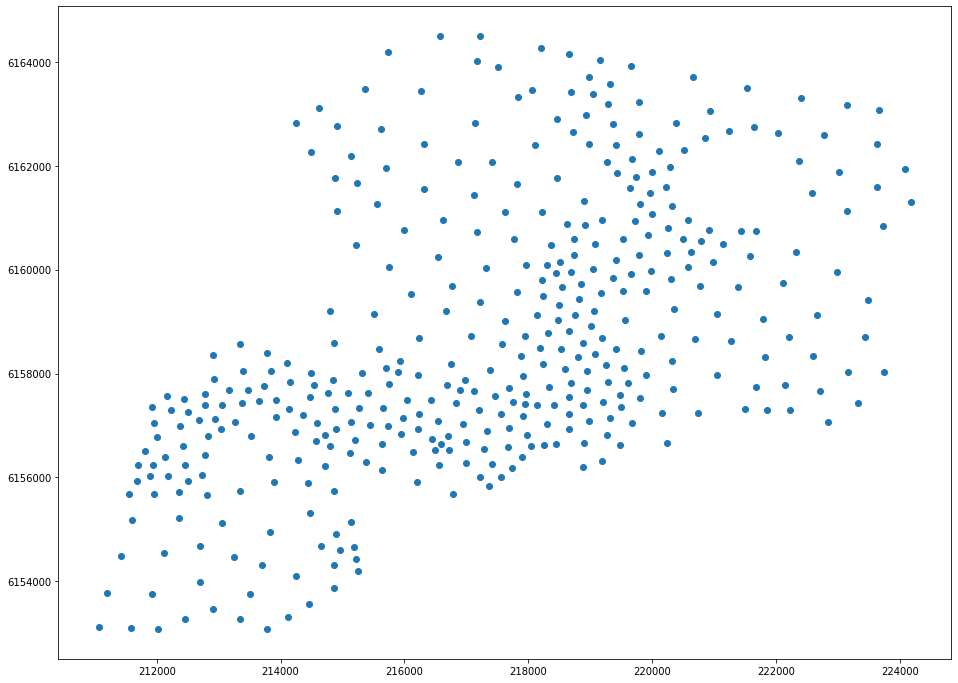

In [3]:
plt.rcParams["figure.figsize"] = (16,12)

nc = msh.get_node_coords()

plt.scatter(nc[:,0],nc[:,1])

# Get a list of land nodes

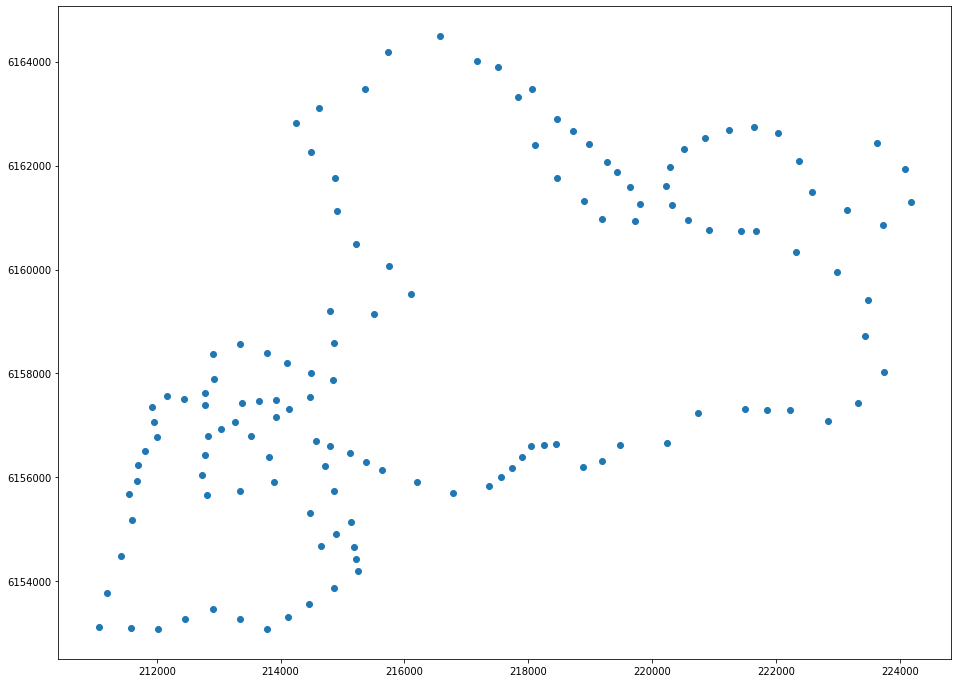

In [4]:
ncland = msh.get_node_coords(code=1)

plt.scatter(ncland[:,0], ncland[:,1])

# Get element coordinates

In [5]:
ec = msh.get_element_coords()

# Calculate distance to closest land node

In [6]:
i = 0
ne = ec.shape[0]
d = np.zeros(ne)

for i in range(ne):
    d[i] = np.min(np.sqrt((ec[i,0] - ncland[:,0])**2 + (ec[i,1] -ncland[:,1])**2))

(6153077.66681803, 6164499.42751662)

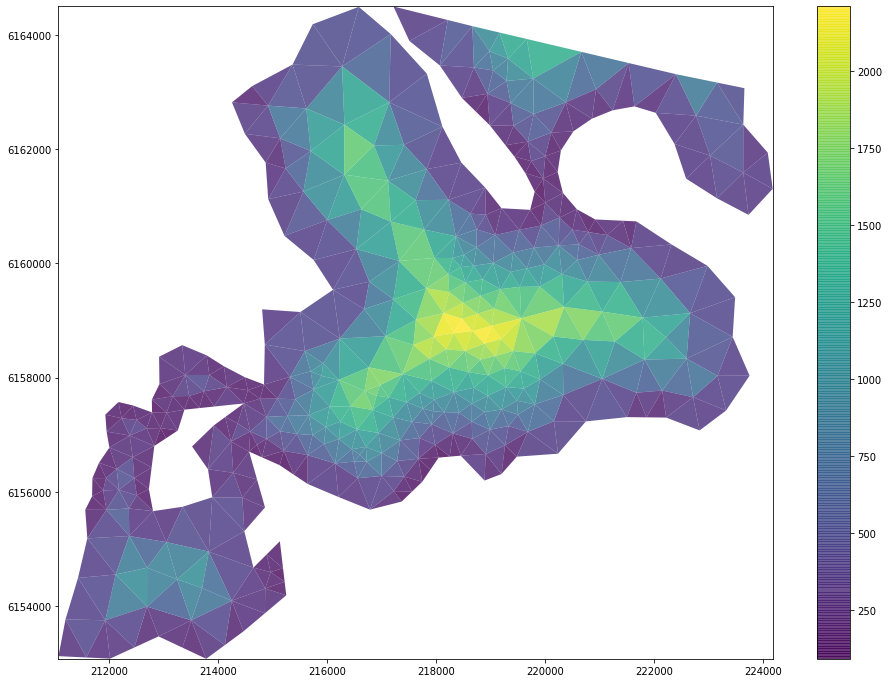

In [7]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

patches = []

for j in range(ne):
    nodes = msh._mesh.ElementTable[j]
    pcoords = np.empty([nodes.Length, 2])
    for i in range(nodes.Length):
        nidx = nodes[i] - 1
        pcoords[i, :] = nc[nidx,0:2]
        
    polygon = Polygon(pcoords, True)
    patches.append(polygon)

fig, ax = plt.subplots()


p = PatchCollection(patches, alpha=0.8)

p.set_array(d)
ax.add_collection(p)
fig.colorbar(p, ax=ax)
ax.set_xlim(nc[:,0].min(), nc[:,0].max())
ax.set_ylim(nc[:,1].min(), nc[:,1].max())


# Store result in a new Dfsu file

In [8]:
data = list()
data.append(d.reshape(1,-1))

data[0].shape

(1, 654)

In [10]:
dfs = Dfsu()
dfsufilename = r"distance.dfsu"
dfs.create(meshfilename, dfsufilename, data, names=["Distance to land"])

# Clean up

In [11]:
import os
os.remove(dfsufilename)